# IMPORTING LIBRARIES

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# READ THE DATASET

In [101]:
data=pd.read_csv("Hobby_Data.csv")
data.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
1,Yes,Yes,Yes,Mathematics,Yes,3,2,No,No,No,No,No,1,Academics
2,Yes,Yes,Yes,Science,Yes,5,1,Yes,No,No,No,No,1,Academics
3,Yes,Yes,Yes,Mathematics,Yes,5,1,Yes,No,No,No,Maybe,3,Academics
4,Yes,Yes,Yes,Science,Yes,5,3,No,No,No,No,No,2,Academics


In [102]:
data.shape

(1601, 14)

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Olympiad_Participation  1601 non-null   object
 1   Scholarship             1601 non-null   object
 2   School                  1601 non-null   object
 3   Fav_sub                 1601 non-null   object
 4   Projects                1601 non-null   object
 5   Grasp_pow               1601 non-null   int64 
 6   Time_sprt               1601 non-null   int64 
 7   Medals                  1601 non-null   object
 8   Career_sprt             1601 non-null   object
 9   Act_sprt                1601 non-null   object
 10  Fant_arts               1601 non-null   object
 11  Won_arts                1601 non-null   object
 12  Time_art                1601 non-null   int64 
 13  Predicted Hobby         1601 non-null   object
dtypes: int64(3), object(11)
memory usage: 175.2+ KB


In [104]:
data.isnull().sum()

Olympiad_Participation    0
Scholarship               0
School                    0
Fav_sub                   0
Projects                  0
Grasp_pow                 0
Time_sprt                 0
Medals                    0
Career_sprt               0
Act_sprt                  0
Fant_arts                 0
Won_arts                  0
Time_art                  0
Predicted Hobby           0
dtype: int64

In [105]:
for each in data.columns:
    print("Unique Values in: ",each)
    print(data[each].unique())
    print("\n")

Unique Values in:  Olympiad_Participation
['Yes' 'No']


Unique Values in:  Scholarship
['Yes' 'No']


Unique Values in:  School
['Yes' 'No']


Unique Values in:  Fav_sub
['Mathematics' 'Science' 'Any language' 'History/Geography']


Unique Values in:  Projects
['Yes' 'No']


Unique Values in:  Grasp_pow
[5 3 6 2 1 4]


Unique Values in:  Time_sprt
[1 2 3 5 4 6]


Unique Values in:  Medals
['Yes' 'No']


Unique Values in:  Career_sprt
['No' 'Yes']


Unique Values in:  Act_sprt
['No' 'Yes']


Unique Values in:  Fant_arts
['No' 'Yes']


Unique Values in:  Won_arts
['Maybe' 'No' 'Yes']


Unique Values in:  Time_art
[3 1 2 4 6 5]


Unique Values in:  Predicted Hobby
['Academics' 'Arts' 'Sports']




# EXPLORATORY DATA ANALYSIS

C:\Users\priyu\AppData\Local\Temp\ipykernel_13480\3702637715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="pastel")
C:\Users\priyu\AppData\Local\Temp\ipykernel_13480\3702637715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="pastel")
C:\Users\priyu\AppData\Local\Temp\ipykernel_13480\3702637715.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="pastel"

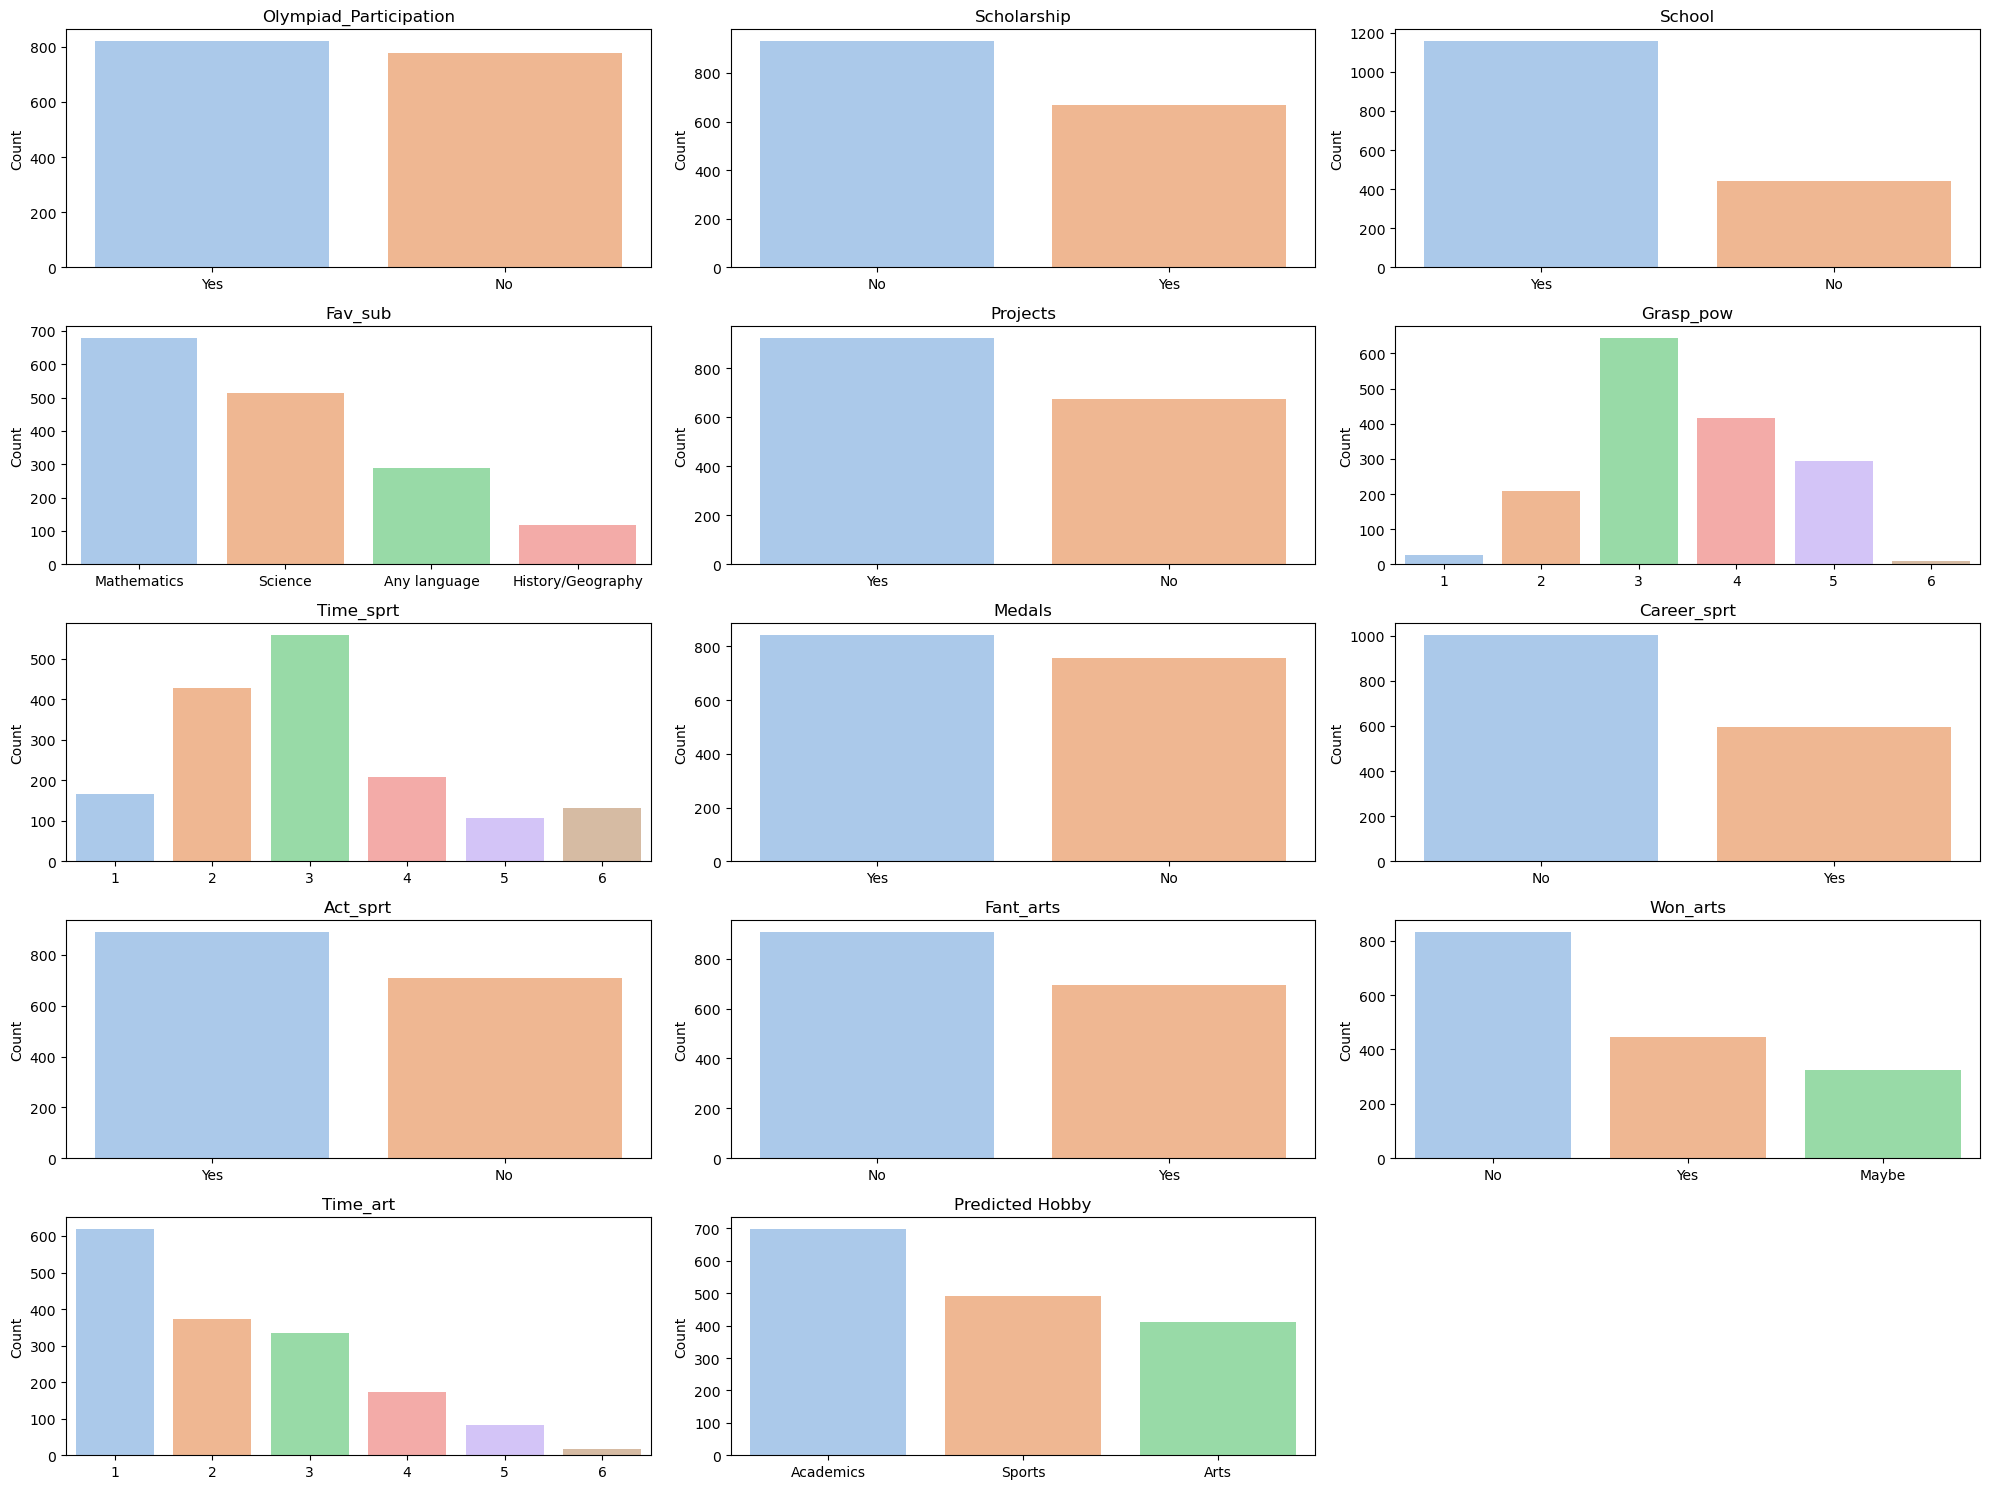

In [106]:
n_cols = 3  
n_rows = -(-len(data.columns) // n_cols)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(data.columns):
    ax = axes[i]
    value_counts = data[col].value_counts()
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette="pastel")
    ax.set_title(col, fontsize=12)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

for i in range(len(data.columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

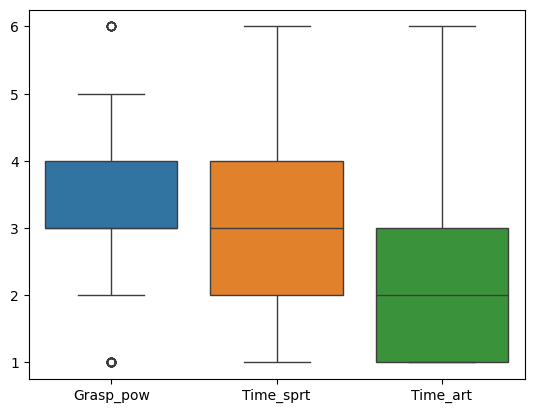

In [107]:
sns.boxplot(data=data)
plt.show()

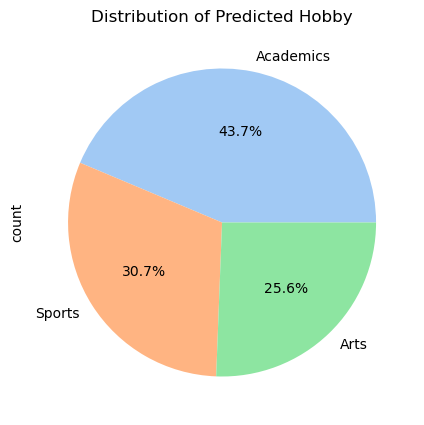

In [108]:
plt.figure(figsize=(10,5))
data["Predicted Hobby"].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Predicted Hobby')
plt.show()

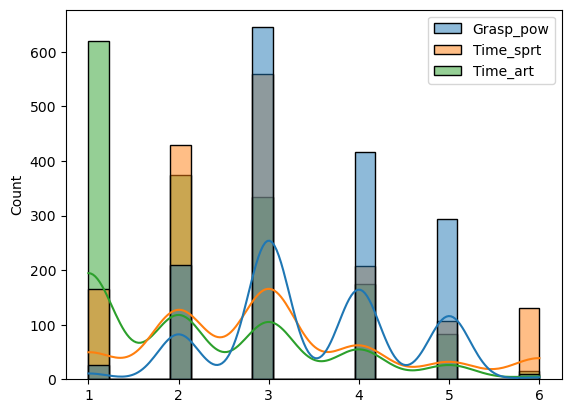

In [109]:
sns.histplot(data,kde=True)
plt.show()

# DATA PREPROCESSING

In [110]:
data["Olympiad_Participation"]=data["Olympiad_Participation"].map({"Yes":1,"No":0})
data["Scholarship"]=data["Scholarship"].map({"Yes":1,"No":0})
data["School"]=data["School"].map({"Yes":1,"No":0})
data["Projects"]=data["Projects"].map({"Yes":1,"No":0})
data["Medals"]=data["Medals"].map({"Yes":1,"No":0})
data["Career_sprt"]=data["Career_sprt"].map({"Yes":1,"No":0})
data["Act_sprt"]=data["Act_sprt"].map({"Yes":1,"No":0})
data["Fant_arts"]=data["Fant_arts"].map({"Yes":1,"No":0})
data["Won_arts"]=data["Won_arts"].map({"Yes":1,"No":0,"Maybe":2})
data["Fav_sub"]=data["Fav_sub"].map({'Mathematics':0, 'Science':1, 'Any language':2, 'History/Geography':3})
data["Predicted Hobby"]=data["Predicted Hobby"].map({'Academics':0, 'Arts':1, 'Sports':2})

In [111]:
data.head()

,Olympiad_Participation,Scholarship,School,Fav_sub,Projects,Grasp_pow,Time_sprt,Medals,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Predicted Hobby
0,1,1,1,0,1,5,1,1,0,0,0,2,3,0
1,1,1,1,0,1,3,2,0,0,0,0,0,1,0
2,1,1,1,1,1,5,1,1,0,0,0,0,1,0
3,1,1,1,0,1,5,1,1,0,0,0,2,3,0
4,1,1,1,1,1,5,3,0,0,0,0,0,2,0


# FEATURE ENGINEERING

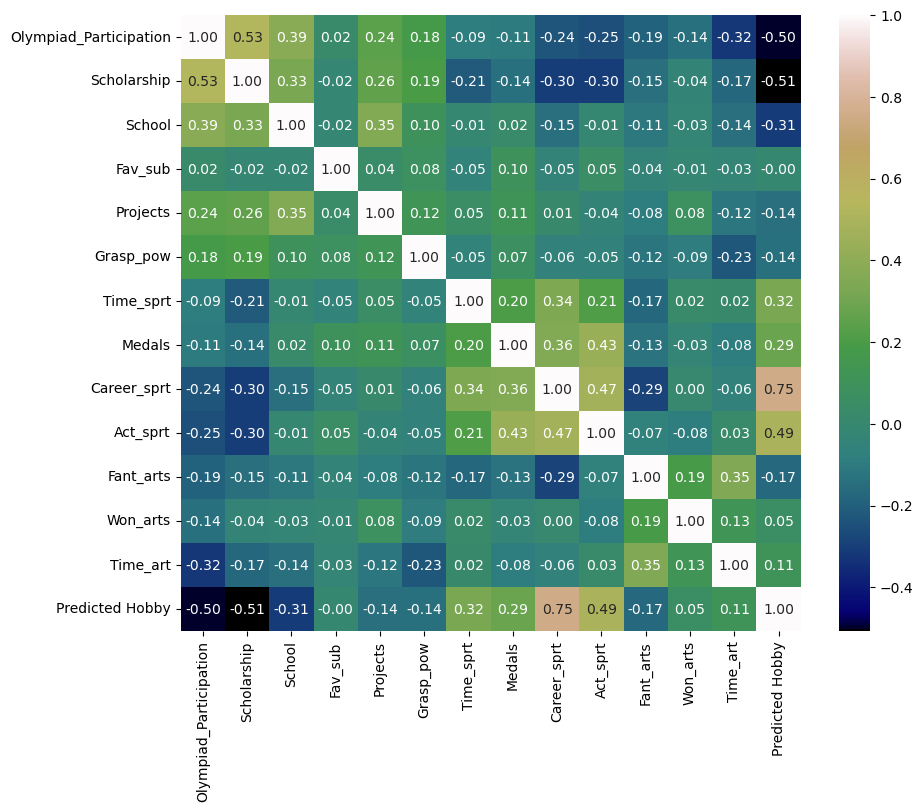

In [112]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt=".2f",cmap='gist_earth')
plt.show()

In [113]:
features=data.drop("Predicted Hobby",axis=1)
target=data["Predicted Hobby"]

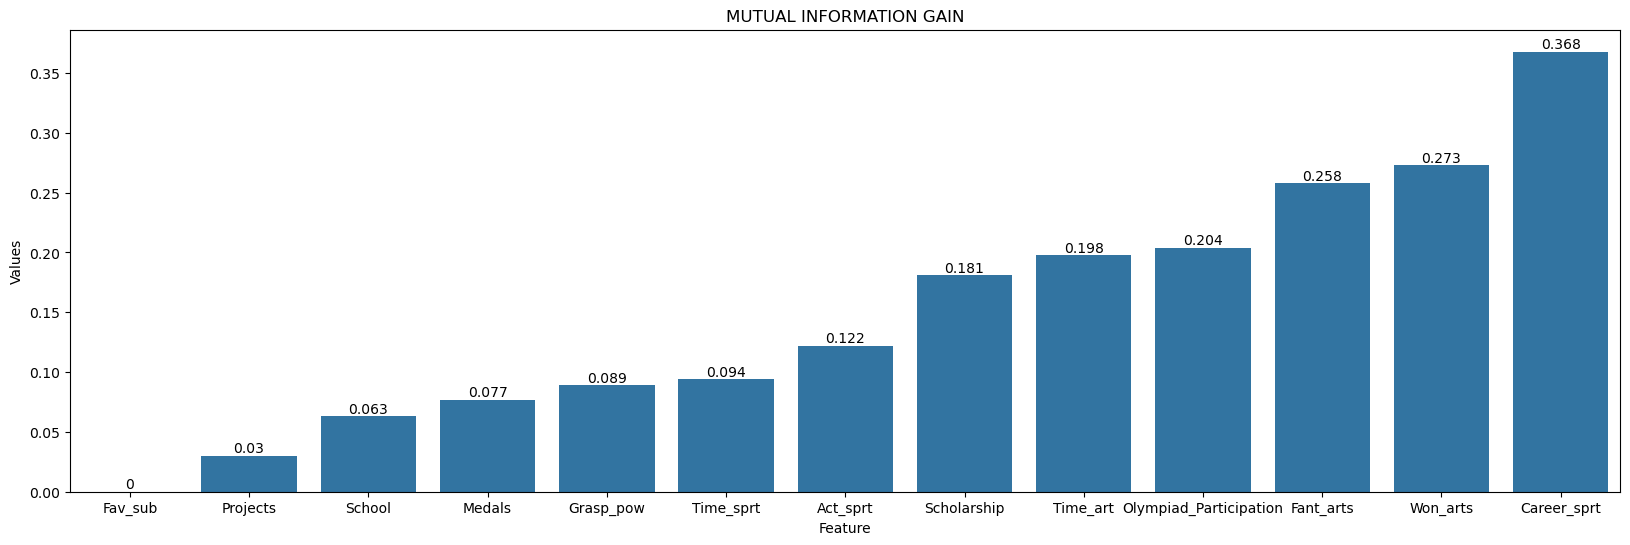

In [114]:
info=mutual_info_classif(features,target)
mutual_info=pd.Series(info)
mutual_info.index=features.columns
df=pd.DataFrame({"Feature":mutual_info.index,"Values":mutual_info})
df.sort_values(ascending=True,by="Values",inplace=True)
df["Values"]=df["Values"].round(3)
plt.figure(figsize=(20,6))
bar=sns.barplot(x="Feature",y="Values",data=df)
bar.bar_label(bar.containers[0])
plt.title("MUTUAL INFORMATION GAIN")
plt.show()

In [115]:
features.drop(["Projects","Fav_sub","Medals","Time_sprt"],axis=1,inplace=True)

# AGE COLUMN

In [116]:
def assign_age(row):
    if (row["Olympiad_Participation"] == 0 and
        row["Scholarship"] == 0 and
        row["Career_sprt"] == 0 and
        row["Fant_arts"] == 0 and
        row["Won_arts"] == 0 and
        row["Time_art"]<=1):    
        return random.randint(1, 4)
    
    if (row["Olympiad_Participation"] == 0 and
        row["Scholarship"] == 0 and
        row["Won_arts"] in [0,2]):
        return random.randint(5, 6)
    
    if (row["Olympiad_Participation"] == 1 or
        row["Scholarship"] == 1): 
        return random.randint(7, 8)
    
    return random.randint(1, 8)

features["Age"] = features.apply(assign_age, axis=1)

In [117]:
features

,Olympiad_Participation,Scholarship,School,Grasp_pow,Career_sprt,Act_sprt,Fant_arts,Won_arts,Time_art,Age
0,1,1,1,5,0,0,0,2,3,8
1,1,1,1,3,0,0,0,0,1,8
2,1,1,1,5,0,0,0,0,1,7
3,1,1,1,5,0,0,0,2,3,7
4,1,1,1,5,0,0,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...
1596,0,0,1,3,1,1,0,0,2,5
1597,1,0,1,4,1,0,0,1,4,8
1598,1,0,1,3,1,0,0,2,2,7
1599,1,1,1,4,1,0,1,2,2,7


# MODEL BUILDING

In [118]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [119]:
X_train.shape

(1120, 10)

In [120]:
X_test.shape

(481, 10)

## RANDOM FOREST CLASSIFIER

In [121]:
parameters={"criterion":['gini','entropy'],
            "max_depth":[2,4,6,8,10],
            "min_samples_split":[3,5,7,9],
            "max_features":["sqrt","log2"],
            "n_estimators":[20,40,60,80,100]}
model=RandomForestClassifier()
tuning=GridSearchCV(model,param_grid=parameters,cv=5,scoring='accuracy')

In [122]:
tuning.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [20, 40, 60, 80, 100]},
             scoring='accuracy')

In [123]:
print("Best Parameters:\n", tuning.best_params_)

Best Parameters:
 {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 9, 'n_estimators': 80}


In [124]:
test_pred=tuning.best_estimator_.predict(X_test)

In [125]:
test_accuracy=accuracy_score(test_pred,y_test)
print(f"Test Accuracy- {test_accuracy:.2f}")

Test Accuracy- 0.91


In [126]:
report=classification_report(test_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       220
           1       0.88      0.94      0.91        97
           2       0.95      0.88      0.91       164

    accuracy                           0.91       481
   macro avg       0.91      0.91      0.91       481
weighted avg       0.91      0.91      0.91       481



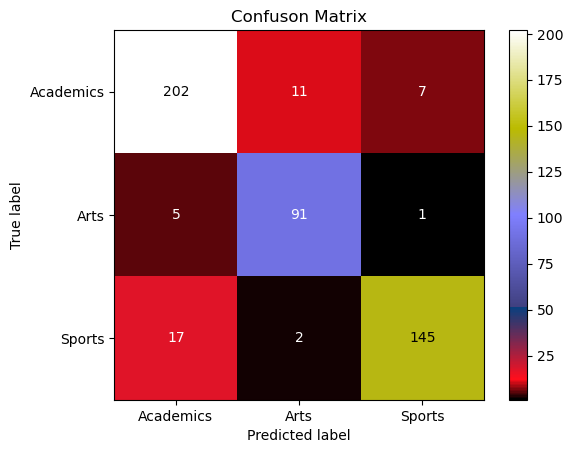

In [127]:
matrix=confusion_matrix(test_pred,y_test)
cm=ConfusionMatrixDisplay(matrix,display_labels=["Academics","Arts","Sports"])
cm.plot(cmap="gist_stern")
plt.title("Confusion Matrix")
plt.show()

In [128]:
import pickle

with open('rf_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as rf_model.pkl")

Model saved as rf_model.pkl


## LOGISTIC REGRESSION

In [129]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [130]:
print("Test Accuracy: ",round(accuracy_score(y_pred,y_test),2))

Test Accuracy:  0.91


In [131]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       213
           1       0.90      0.88      0.89       107
           2       0.94      0.89      0.92       161

    accuracy                           0.91       481
   macro avg       0.91      0.90      0.91       481
weighted avg       0.91      0.91      0.91       481



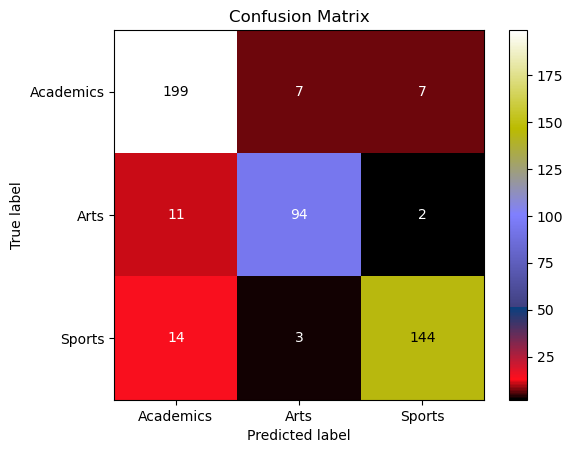

In [134]:
matrix=confusion_matrix(y_pred,y_test)
cm=ConfusionMatrixDisplay(matrix,display_labels=["Academics","Arts","Sports"])
cm.plot(cmap="gist_stern")
plt.title("Confusion Matrix")
plt.show()

In [133]:
with open('lr_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as lr_model.pkl")

Model saved as lr_model.pkl
